
## Joe Garcia

## 12/14/25

## Professor Ledon

## Data 620 - Web Analytics

## Week 8 Assignment High Frequency Words 

## Corpus Selection and Goal

For this assignment, I use the full text of *Moby-Dick* (Herman Melville) from Project Gutenberg as the corpus. The goal is to measure how word frequencies are distributed in a real literary text, identify how concentrated the vocabulary usage is, and evaluate whether the most frequent words approximately follow Zipf’s law.


In [21]:
import re
import math
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from IPython.display import Markdown, display


In [2]:
url = "https://www.gutenberg.org/files/2701/2701-0.txt"
text = requests.get(url).text

In [3]:
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK MOBY DICK ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK MOBY DICK ***"
start_idx = text.find(start_marker)
end_idx = text.find(end_marker)
if start_idx != -1 and end_idx != -1:
    text = text[start_idx + len(start_marker):end_idx]

## Tokenization/Definition of Unique Words

To define “unique words” in a consistent and defensible way, the text is converted to lowercase and tokenized into alphabetic word forms (allowing apostrophes inside words). This approach reduces noise from punctuation and capitalization and produces a vocabulary set that can be counted and compared across frequencies.


In [4]:
tokens = re.findall(r"[a-z]+(?:'[a-z]+)?", text.lower())
total_words = len(tokens)

counts = Counter(tokens)
unique_words = len(counts)

freqs_sorted = sorted(counts.values(), reverse=True)
half_total = total_words / 2
running = 0
k = 0
for f in freqs_sorted:
    running += f
    k += 1
    if running >= half_total:
        break

In [5]:
top_200 = counts.most_common(200)
top_200_df = pd.DataFrame(top_200, columns=["word", "count"])
top_200_df["relative_frequency"] = top_200_df["count"] / total_words



Total words (tokens): 219066
Total unique words: 16957
Unique words to reach 50%: 91


## Frequency Summary

This section computes the total number of word tokens in the corpus, the number of unique words (vocabulary size), and the minimum number of most frequent unique words needed to account for half of all word occurrences. It also identifies the 200 most frequent words and computes their relative frequencies.


In [ ]:
print("Total words (tokens):", total_words)
print("Total unique words:", unique_words)
print("Unique words to reach 50%:", k)

In [6]:
top_200_df

,word,count,relative_frequency
0,the,14537,0.066359
1,of,6626,0.030247
2,and,6447,0.029429
3,a,4747,0.021669
4,to,4627,0.021121
...,...,...,...
195,thee,131,0.000598
196,mast,130,0.000593
197,came,130,0.000593
198,soon,130,0.000593


## Relative Frequency Plot of the Top Words

To visualize how quickly word frequencies drop as rank increases, the top 200 words are plotted by relative frequency. The bar chart highlights how a small number of words dominate the corpus.


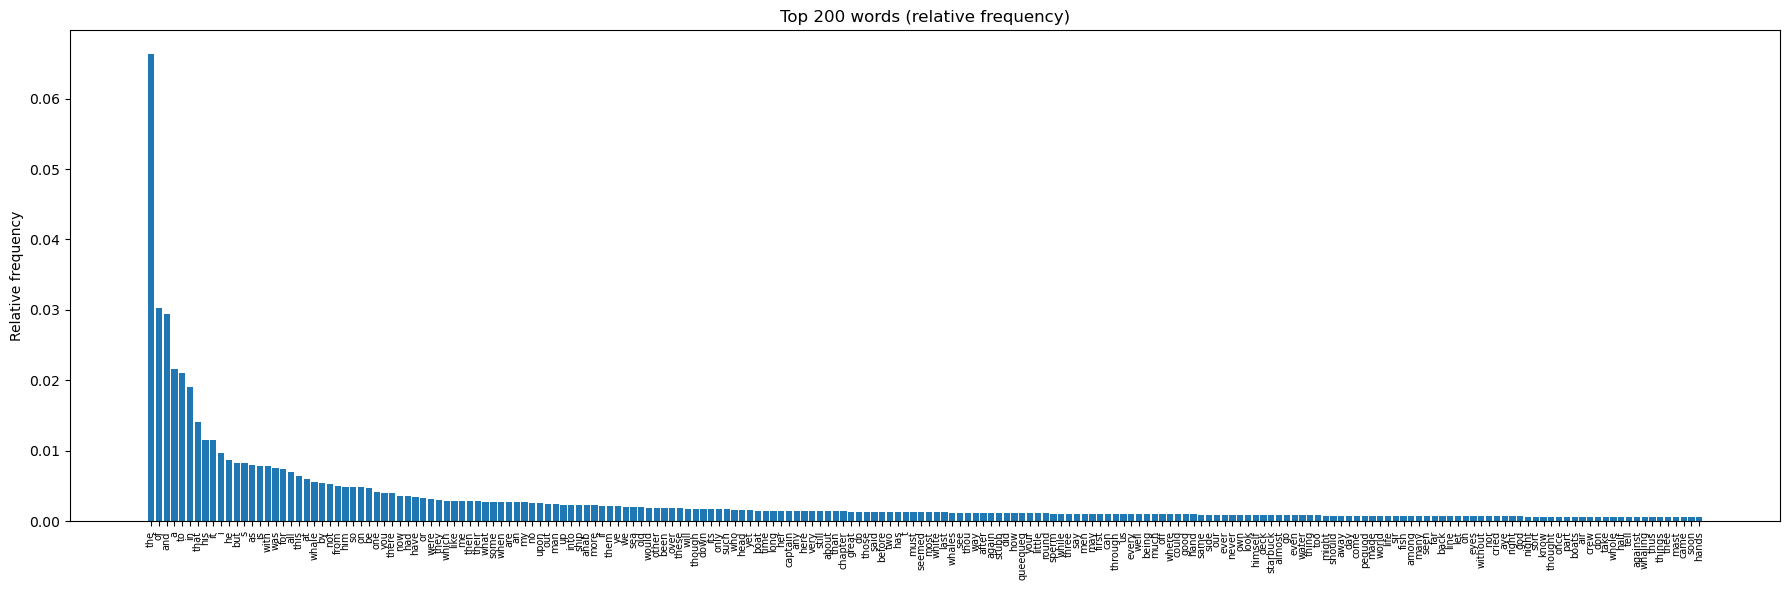

In [7]:
plt.figure(figsize=(18, 6))
plt.bar(top_200_df["word"], top_200_df["relative_frequency"])
plt.xticks(rotation=90, fontsize=7)
plt.ylabel("Relative frequency")
plt.title("Top 200 words (relative frequency)")
plt.tight_layout()
plt.show()

## Rank Versus Relative Frequency

Because a 200-word bar chart can be visually dense, a rank-based plot is also included. Plotting relative frequency against rank provides a clearer view of how rapidly frequency decays as word rank increases.


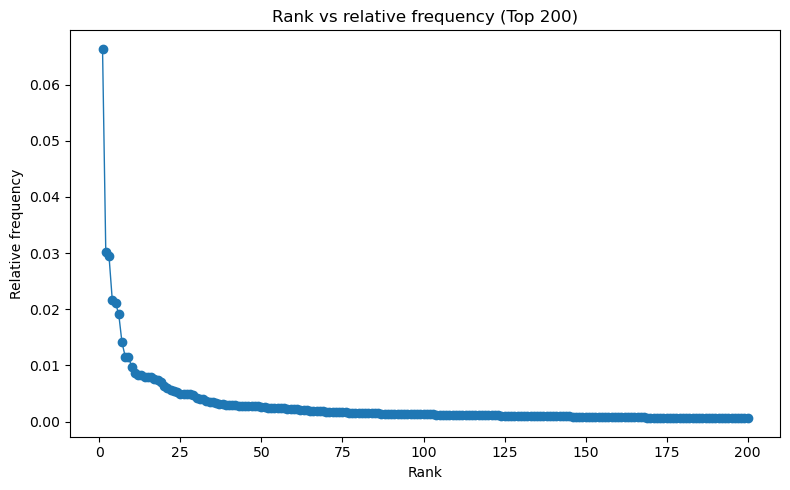

In [8]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, 201), top_200_df["relative_frequency"], marker="o", linewidth=1)
plt.xlabel("Rank")
plt.ylabel("Relative frequency")
plt.title("Rank vs relative frequency (Top 200)")
plt.tight_layout()
plt.show()

## Zipf’s Law Check

Zipf’s law predicts that word frequency is approximately inversely proportional to rank, which implies a near-linear relationship on a log–log plot of rank versus frequency. This section produces the log–log visualization and estimates the slope; a slope near −1 is consistent with Zipf-like behavior.


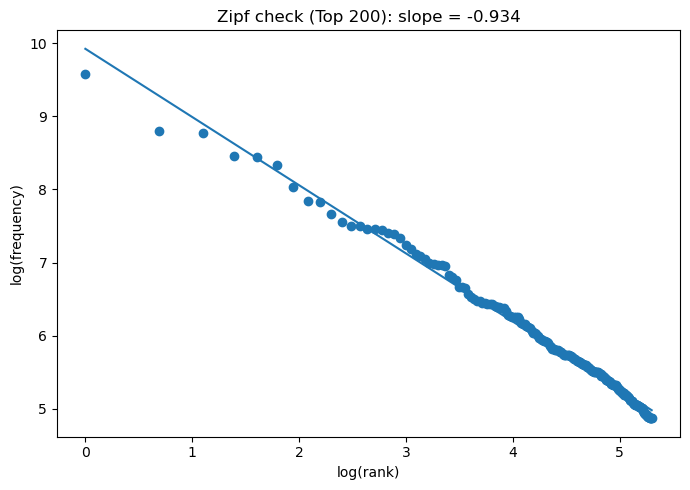

Zipf slope (log-log): -0.934042416623598


In [9]:
ranks = list(range(1, 201))
freq = top_200_df["count"].tolist()
log_ranks = [math.log(r) for r in ranks]
log_freq = [math.log(f) for f in freq]

slope, intercept = np.polyfit(log_ranks, log_freq, 1)

plt.figure(figsize=(7, 5))
plt.scatter(log_ranks, log_freq)
plt.plot(log_ranks, [slope*x + intercept for x in log_ranks])
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title(f"Zipf check (Top 200): slope = {slope:.3f}")
plt.tight_layout()
plt.show()



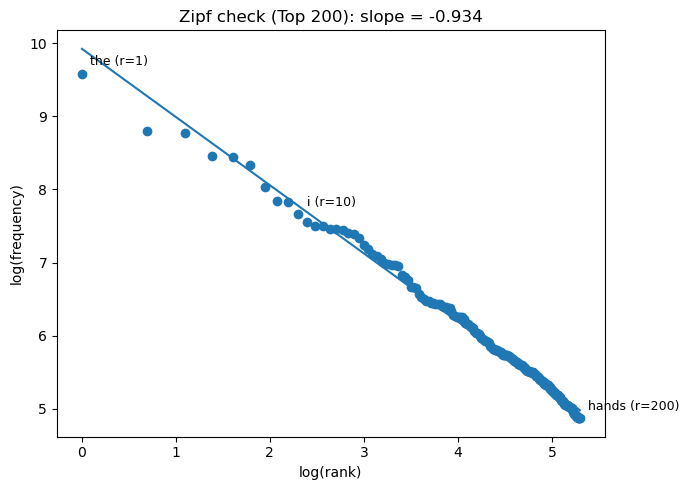

In [11]:
ranks = list(range(1, 201))
freq = top_200_df["count"].tolist()
log_ranks = [math.log(r) for r in ranks]
log_freq = [math.log(f) for f in freq]

slope, intercept = np.polyfit(log_ranks, log_freq, 1)

plt.figure(figsize=(7, 5))
plt.scatter(log_ranks, log_freq)
plt.plot(log_ranks, [slope*x + intercept for x in log_ranks])
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title(f"Zipf check (Top 200): slope = {slope:.3f}")

label_ranks = [1, 10, 200]
for r in label_ranks:
    i = r - 1
    w = top_200_df.loc[i, "word"]
    plt.annotate(
        f"{w} (r={r})",
        (log_ranks[i], log_freq[i]),
        textcoords="offset points",
        xytext=(6, 6),
        ha="left",
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [26]:


w1 = top_200_df.loc[0, "word"]
w10 = top_200_df.loc[9, "word"]
w200 = top_200_df.loc[199, "word"]

zipf_paragraph = (
    f"This log–log plot shows word frequency versus rank for the 200 most common words in the corpus, "
    f"illustrating how quickly word usage drops as you move down the ranking. The labeled point at rank 1 "
    f"corresponds to “{w1}”, the single most frequent word in the text, which appears dramatically more often "
    f"than the rest and sits at the upper-left of the chart. The labeled point at rank 10 corresponds to "
    f"“{w10}”, which is still very common but already much less frequent than the top word, highlighting the "
    f"steep early decline. The labeled point at rank 200 corresponds to “{w200}”, which appears far less often "
    f"and sits near the lower-right, showing that even among the top 200 words there is a strong long tail. "
    f"Together, “{w1}”, “{w10}”, and “{w200}” make the Zipf-like pattern easy to see: a few extremely common words "
    f"dominate the corpus, while many other words occur at much lower frequencies."
)
print(zipf_paragraph)


This log–log plot shows word frequency versus rank for the 200 most common words in the corpus, illustrating how quickly word usage drops as you move down the ranking. The labeled point at rank 1 corresponds to “the”, the single most frequent word in the text, which appears dramatically more often than the rest and sits at the upper-left of the chart. The labeled point at rank 10 corresponds to “i”, which is still very common but already much less frequent than the top word, highlighting the steep early decline. The labeled point at rank 200 corresponds to “hands”, which appears far less often and sits near the lower-right, showing that even among the top 200 words there is a strong long tail. Together, “the”, “i”, and “hands” make the Zipf-like pattern easy to see: a few extremely common words dominate the corpus, while many other words occur at much lower frequencies.


## Zipf’s Law Explanation

Zipf’s law predicts that word frequency is approximately inversely proportional to rank, which appears as a near-straight line on a log–log plot of rank versus frequency. In this corpus, the top 200 words form a clear downward, roughly linear pattern on the log–log scale, and the fitted slope printed by the notebook is a quantitative check of that relationship (values near −1 are most consistent with Zipf’s law). While real corpora rarely follow a perfect line, the overall trend in this plot supports the conclusion that the word frequencies are broadly Zipf-like.


## Interpretation and Corpus Differences

This corpus reflects a single author, genre, and time period, so its vocabulary and frequency distribution can differ from large, mixed corpora such as news, social media, or web-scale text. Domain-specific terms related to sailing and whaling may appear more frequently than they would in general language, and stylistic choices can shift the concentration of common words.


In [10]:
print("Zipf slope (log-log):", slope)

Zipf slope (log-log): -0.934042416623598
